In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [39]:
df = pd.read_csv('https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/week2/CSWS_Population.csv')

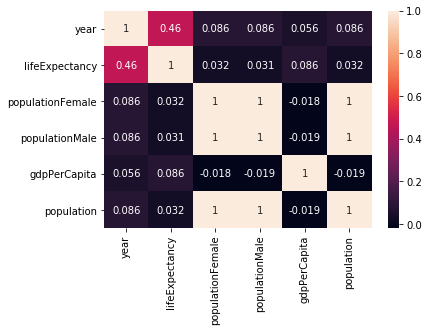

In [74]:
sns.heatmap(df.corr(), annot=True)
#from general view about correlation, year and life Expectancy are two factors that affect to population most
#I think I will start with 1st feature, life Expectancy to test it out

In [72]:
df.head()
#exclude all empty values from data that relates to target fields
#since life expectancy may be affected by other features , such as war, geography and gene. So I will filter one country out to
#eliminate those factors. I will pick Pakistan as an example
df_life = df[(df['lifeExpectancy'].isnull() == False) & (df['population'].isnull() == False) & (df['country'] == 'Pakistan')]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_life[['lifeExpectancy']], df_life['population'], test_size = 0.3, random_state=101)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#I am not sure about the degree. So maybe I will make a loop to find an optimal degree that provides lowest test_error value
lastDegree = 0
lastTest_error = 1000000000
for i in range(20):
    poly_reg = PolynomialFeatures(i)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.fit_transform(X_test)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_test_predict = poly_model.predict(X_test_poly)
    # calculate the residual errors 
    test_error = np.sqrt(np.mean(np.square(y_test_predict - y_test)))
    if(test_error < lastTest_error):
        lastDegree = i
        lastTest_error = test_error
print(lastDegree)

9


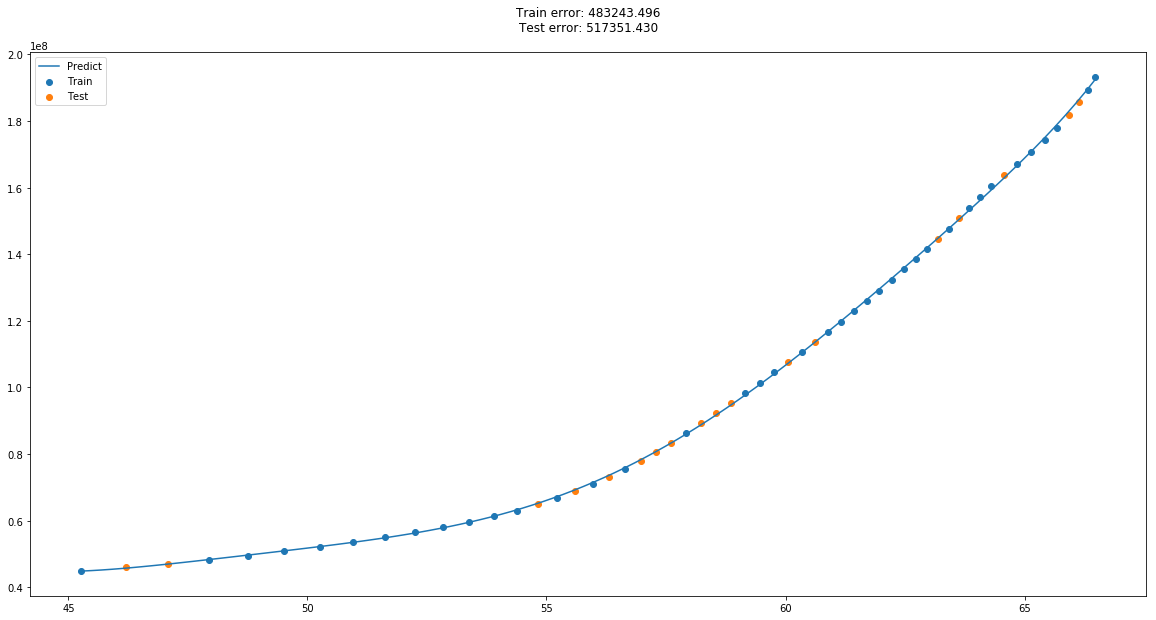

In [69]:
#so 9 maybe the most optimal degree in range 20.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_life[['lifeExpectancy']], df_life['population'], test_size = 0.3, random_state=101)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(9)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_predict = poly_model.predict(X_train_poly)
y_test_predict = poly_model.predict(X_test_poly)

# calculate the residual errors 
train_error = np.sqrt(np.mean(np.square(y_train_predict - y_train)))
test_error = np.sqrt(np.mean(np.square(y_test_predict - y_test)))
  
# Visualization
plt.figure(figsize=(20, 10))
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')

X_train_2 = np.linspace(X_train.min(), X_train.max(), 100)
plt.plot(X_train_2, poly_model.predict(poly_reg.fit_transform(X_train_2.reshape(-1, 1))), label='Predict')
plt.title('Train error: {:.3f}\nTest error: {:.3f}\n'.format(train_error, test_error))
plt.legend(loc="best")
plt.show()
    

In [75]:
#it seems like they fit to each other.